In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# Load the dataset
file_path = 'Premier League Player Stats.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    540 non-null    int64 
 1   PLAYER  540 non-null    object
 2   TEAM    540 non-null    object
 3   GP      540 non-null    int64 
 4   GS      540 non-null    int64 
 5   MIN     540 non-null    int64 
 6   G       540 non-null    int64 
 7   ASST    540 non-null    int64 
 8   SHOTS   540 non-null    int64 
 9   SOG     540 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 42.3+ KB


,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


C:\Users\tsega\AppData\Local\Temp\ipykernel_25140\387343720.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


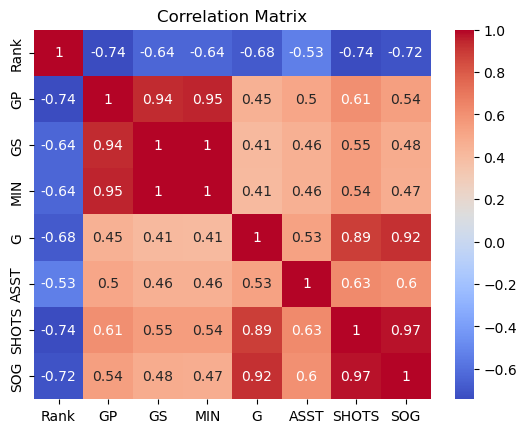

In [4]:
# Check for missing values
df.isnull().sum()

# Descriptive statistics
df.describe()

# Explore correlations between variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [7]:
# Drop irrelevant columns for clustering
columns_to_drop = ['Rank', 'Player', 'Team']
df_clustering = df.drop(columns=columns_to_drop, errors='ignore')

# Save non-numeric columns for later use
non_numeric_columns = df_clustering.select_dtypes(exclude=np.number).columns

# Handle missing values for numeric columns
df_clustering.fillna(0, inplace=True)

# Standardize only numeric features
numeric_columns = df_clustering.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df_scaled_numeric = scaler.fit_transform(df_clustering[numeric_columns])

# Combine the standardized numeric features with the non-numeric features
df_scaled = pd.DataFrame(data=df_scaled_numeric, columns=numeric_columns, index=df_clustering.index)
df_scaled[non_numeric_columns] = df_clustering[non_numeric_columns]
#


C:\Users\tsega\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tsega\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


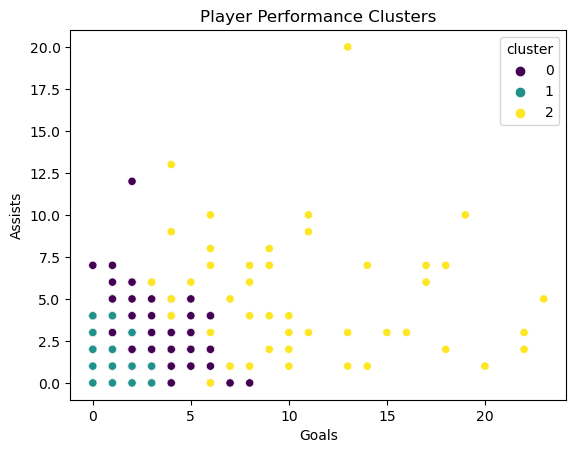

In [16]:
# Choose the number of clusters
num_clusters = 3

# Select only numeric columns for clustering
df_numeric_for_clustering = df_scaled.select_dtypes(include=np.number)

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df_numeric_for_clustering)

# Visualize the clusters
sns.scatterplot(x='G', y='ASST', hue='cluster', data=df, palette='viridis')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.title('Player Performance Clusters')
plt.show()


C:\Users\tsega\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tsega\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\tsega\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tsega\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

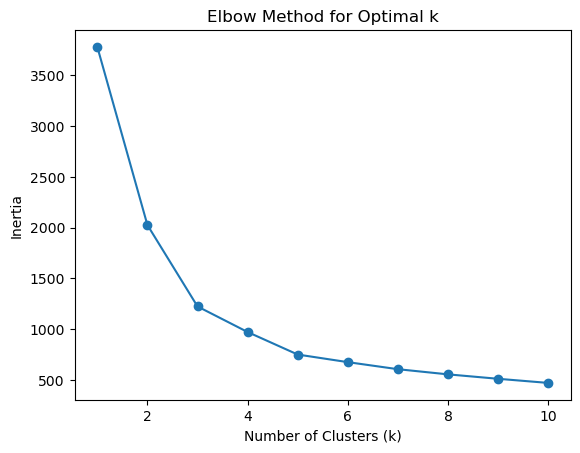

In [17]:
# Elbow Method
value = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_numeric_for_clustering)
    value.append(kmeans.inertia_)

plt.plot(range(1, 11), value, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
